In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load the data
flower=pd.read_csv('iris.csv')

In [3]:
flower.head()

,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [4]:
flower.describe()

,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [5]:
#to display basic info about data
flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthcm  150 non-null    float64
 1   SepalWidthcm   150 non-null    float64
 2   PetalLengthcm  150 non-null    float64
 3   PetalWidthcm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
#to display number of samples of each class
flower['Species'].value_counts()

1    50
2    50
3    50
Name: Species, dtype: int64

In [7]:
#preprocessing: check null
flower.isnull().sum()

SepalLengthcm    0
SepalWidthcm     0
PetalLengthcm    0
PetalWidthcm     0
Species          0
dtype: int64

<AxesSubplot: >

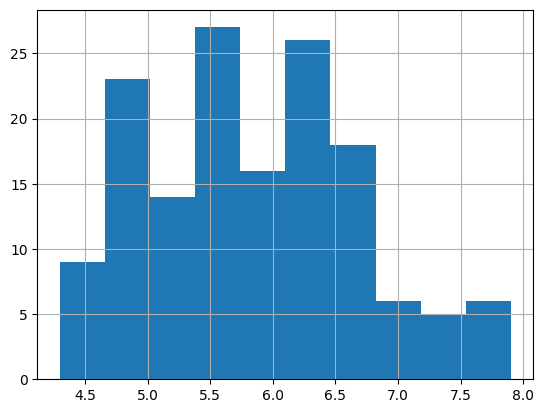

In [8]:
#eda
flower['SepalLengthcm'].hist()

<AxesSubplot: >

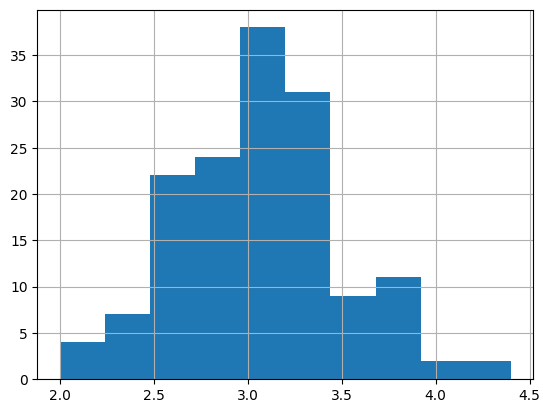

In [9]:
flower['SepalWidthcm'].hist()

<AxesSubplot: >

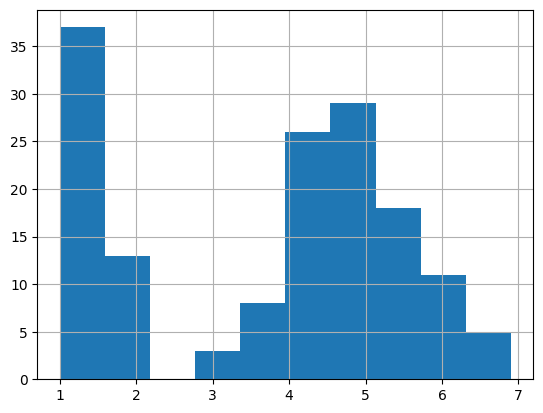

In [10]:
flower['PetalLengthcm'].hist()

<AxesSubplot: >

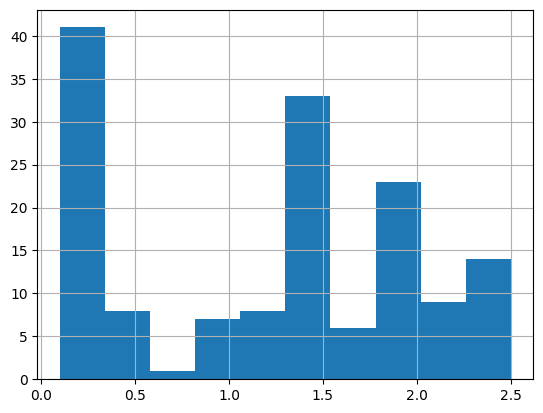

In [11]:
flower['PetalWidthcm'].hist()

In [16]:
#scatterplot
colors=['red','yellow','blue']
species=[1,2,3]

In [17]:
flower

,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


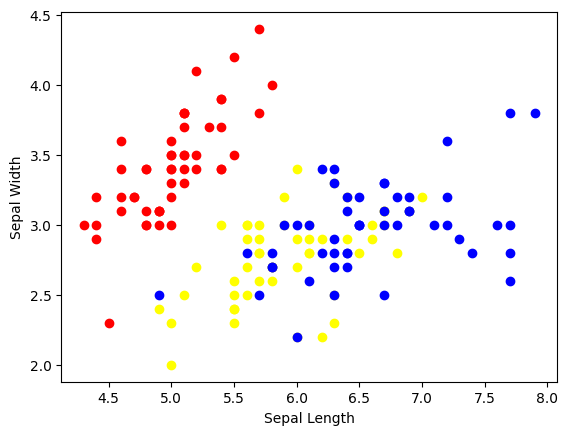

In [32]:
for i in range(3):
#     print(flower)
    new_flower=flower[flower['Species']==species[i]]
    plt.scatter(new_flower['SepalLengthcm'],new_flower['SepalWidthcm'],c = colors[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
x = flower[flower['Species'] == species[0]]
x

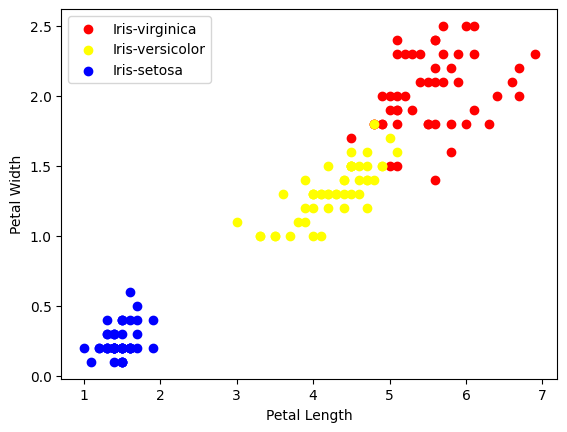

In [22]:
for i in range(3):
    x = flower[flower['Species'] == species[i]]
    plt.scatter(x['PetalLengthcm'], x['PetalWidthcm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

In [23]:
flower.corr()

,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm
SepalLengthcm,1.000000,-0.109369,0.871754,0.817954
SepalWidthcm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthcm,0.871754,-0.420516,1.000000,0.962757
PetalWidthcm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot: >

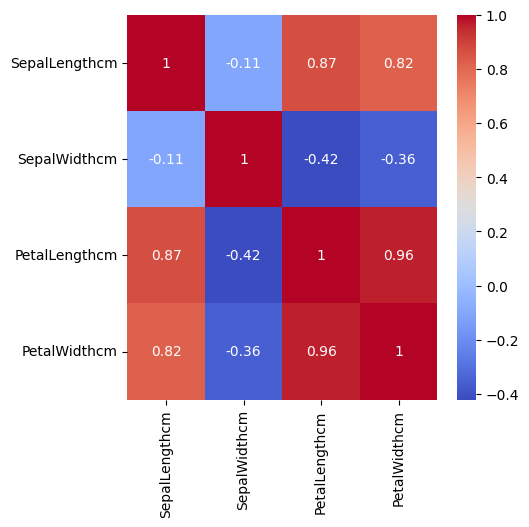

In [25]:
corr=flower.corr()
fig,ax=plt.subplots(figsize=(5,5))
sb.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
flower['Species']=le.fit_transform(flower['Species'])
flower.head()

,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = flower.drop(columns=['Species'])
Y = flower['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [33]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [35]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [37]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [39]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [34]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
# model training
model.fit(x_train, y_train)
X_new=np.array([[3,2,1,0.2],[4.9,2.1,3.8,1.1],[5.3,2.5,4.6,1.9]])
prediction=model.predict(X_new)
print("Prediction of species: {}".format(prediction))

NameError: name 'x_train' is not defined